In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('AAPL.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500
9908,2020-04-01,246.500000,248.720001,239.130005,240.910004,240.910004,43956200


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


## dataset info:

* the data covers 9909 days of the market.
* the holidays in which the market is closed are ommited.
* the data is from 1980/12/12 (Apple makes its initial public offering on the US stock market this day) until 2020/4/1

## Columns information

* Date: specifies trading date
* Open: opening price
* High: maximum price during the day
* Low: minimum price during the day
* Close: close price adjusted for splits
* Adj Close: adjusted close price adjusted for both dividends and splits.
* Volume: the number of shares that changed hands during a given day

## Data Demonstration

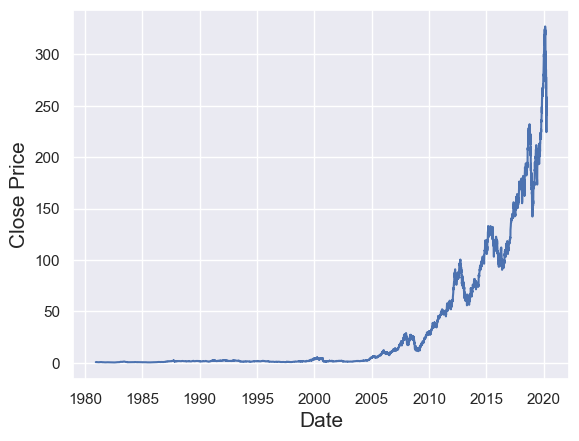

In [7]:
date = pd.to_datetime(data ['Date'], format = '%Y-%m-%d')
plt.plot(date, data ['Close'])
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Close Price', fontsize = 15)
plt.show()

## Cleaning data
we condsider data of (2019-1-2 to the end) as test data and (2005-01-03 to 2019-01-02) as learning data

In [8]:
train_data = data[data.index[data ['Date'] == '2005-01-03'][0]:data.index[data ['Date'] == '2019-01-02'][0]]
test_data = data[data.index[data ['Date'] == '2019-01-03'][0]:]
all_data = data[data.index[data ['Date'] == '2005-01-03'][0]:]
all_data_date = pd.to_datetime(all_data ['Date'], format = '%Y-%m-%d')
all_data_date_numerical = all_data_date.map(dt.datetime.toordinal)

In [9]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
6071,2005-01-03,4.627143,4.650714,4.471428,4.520714,3.924165,172998000
6072,2005-01-04,4.556428,4.676429,4.497857,4.567143,3.964467,274202600
6073,2005-01-05,4.604286,4.660714,4.575000,4.607143,3.999188,170108400
6074,2005-01-06,4.619286,4.636428,4.523571,4.610714,4.002288,176388800
6075,2005-01-07,4.642857,4.973571,4.625000,4.946429,4.293701,556862600


In [10]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
9595,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.753540,91312200
9596,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.719513,58607100
9597,2019-01-07,148.699997,148.830002,145.899994,147.929993,145.395203,54777800
9598,2019-01-08,149.559998,151.820007,148.520004,150.750000,148.166870,41025300
9599,2019-01-09,151.289993,154.529999,149.630005,153.309998,150.682983,45099100


## Print the Clean Data

In [82]:
import mplfinance as mpf

In [110]:
train_data_date = pd.to_datetime(train_data ['Date'], format = '%Y-%m-%d')
ploting_train_data = pd.concat([train_data['Open'], train_data['High'], train_data['Low'], train_data['Close'], train_data['Volume']], axis =1)
ploting_train_data.index = train_data_date
ploting_train_data.index.name = 'Date'
ploting_train_data

,Open,High,Low,Close,Volume
Date,,,,,
2005-01-03,4.627143,4.650714,4.471428,4.520714,172998000
2005-01-04,4.556428,4.676429,4.497857,4.567143,274202600
2005-01-05,4.604286,4.660714,4.575000,4.607143,170108400
2005-01-06,4.619286,4.636428,4.523571,4.610714,176388800
2005-01-07,4.642857,4.973571,4.625000,4.946429,556862600
...,...,...,...,...,...
2018-12-24,148.149994,151.550003,146.589996,146.830002,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,58582500
2018-12-27,155.839996,156.770004,150.070007,156.149994,53117100


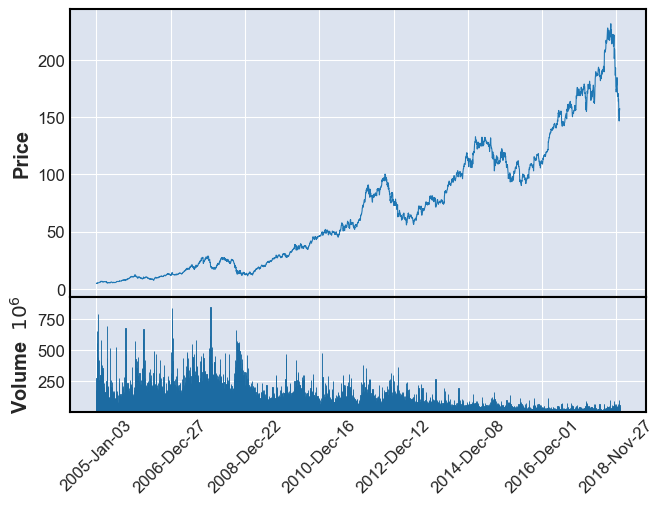

In [111]:
mpf.plot(ploting_train_data,type='line', volume=True)

In [112]:
test_data_date = pd.to_datetime(test_data ['Date'], format = '%Y-%m-%d')
ploting_test_data = pd.concat([test_data['Open'], test_data['High'], test_data['Low'], test_data['Close'], test_data['Volume']], axis =1)
ploting_test_data.index = test_data_date
ploting_test_data.index.name = 'Date'
ploting_test_data

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-03,143.979996,145.720001,142.000000,142.190002,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,41025300
2019-01-09,151.289993,154.529999,149.630005,153.309998,45099100
...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,63021800
2020-03-27,252.750000,255.869995,247.050003,247.740005,51054200
2020-03-30,250.740005,255.520004,249.399994,254.809998,41994100


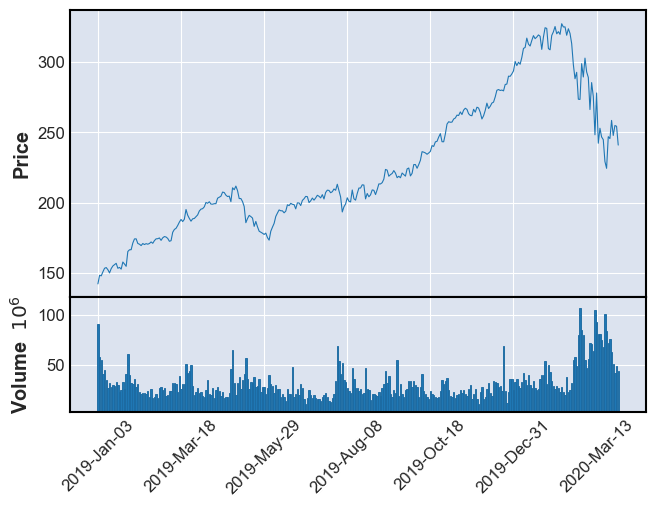

In [ ]:
mpf.plot(ploting_test_data,type='line', volume=True)

### Regression Analysis

In [26]:
from sklearn.linear_model import LinearRegression

In [34]:
train_data_date.shape

(3523,)

In [40]:
x_matrix = train_data_date_numerical.values.reshape(-1,1)
y_matrix = train_data ['Close']

In [41]:
reg = LinearRegression()

In [42]:
reg.fit(x_matrix, y_matrix)

LinearRegression()

In [43]:
# this is the r-squared error
reg.score(x_matrix, y_matrix)

0.8917283718094867

In [44]:
reg.coef_

array([0.03534672])

In [46]:
# this is the constant
reg.intercept_

-25892.897581806985

In [66]:
# predict
predict_prices = reg.predict(all_data_date_numerical.values.reshape(-1,1))

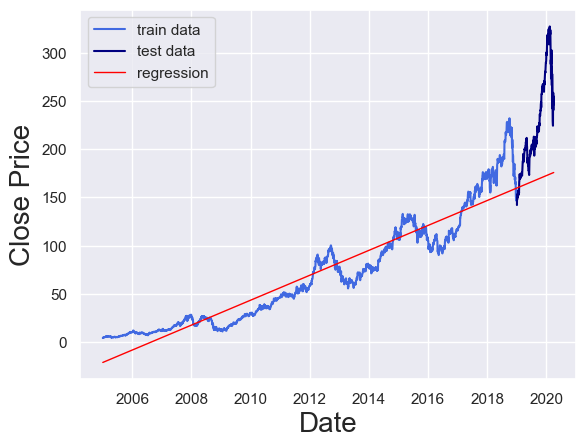

In [67]:
plt.plot(train_data_date,train_data['Close'], c = "royalblue", label ='train data')
plt.plot(test_data_date,test_data['Close'], c = "navy" ,label ='test data')
# Plot the regression line against the independent variable
plt.plot(all_data_date,predict_prices, lw=1, c='red', label ='regression')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Close Price', fontsize = 20)
plt.legend()
plt.show()

In [68]:
# multi variable linear regression
reg2 = LinearRegression()

In [70]:
x_matrix = pd.concat([train_data_date_numerical, train_data ['Open']], axis = 1)
y_matrix = train_data ['Close']